<a href="https://colab.research.google.com/github/AbhishekPatwardhan/Project_/blob/main/SkimLit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset we are using is from the PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts.

The dataset consists of approximately 200,000 abstracts of randomized controlled trials, totaling 2.3 million sentences. Each sentence of each abstract is labeled with their role in the abstract using one of the following classes: background, objective, method, result, or conclusion.

Automatically classifying each sentence in an abstract would help researchers read abstracts more efficiently, especially in fields where abstracts may be long, such as the medical field.

the authors of the paper have made the data they used for their research availably publically and for free in the form of .txt files on GitHub.

We can copy them to our local directory using git clone https://github.com/Franck-Dernoncourt/pubmed-rct.

In [ ]:
! git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
! ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (33/33), 177.08 MiB | 10.52 MiB/s, done.
Resolving deltas: 100% (12/12), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


As a machine laerning practioner we should always try to train the the model on 10% of the data so as the model will learn the feature more accurately.

Here the authors of the paper also done that by splitting the complete "PubMed_200k_RCT" to "PubMed_20k_RCT"

In [ ]:
# Let's check the file contents.

! ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


PubMed_20k_RCT_numbers_replaced_with_at_sign consist up of dev.txt which is the validationdataset ,train.text as traindataset , test.txt as the test dataset

In [ ]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
# Create function to read the lines of a document

def get_lines(filename):
  file=open(filename,"r")
  return file.readlines()

file.readlines() is a inbuilt function in python which will covnvert each sentence from the text file as the element of list.


In [ ]:
train_lines=get_lines(data_dir+'train.txt')
train_lines[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

Data Preprocessing

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines=get_lines(filename) # get all lines from the abstract as the elements of the list
  abstract_lines=""
  abstract_list=[] # we have to return the list of dictonaries
  # Travesre through the input_lines to get a abstract
  for lines in input_lines:
    if lines.startswith('###'): # Clearly stated by the authors that the abstract will satrt with the '###' end with '\n'
        abstract_lines=''
    elif lines.isspace():
      abstract_lines_split=abstract_lines.splitlines() #splits a string into a list. The splitting is done at line breaks.
       # Traverse through single abstract
      for abstract_line_no,sentence in enumerate(abstract_lines_split):
             line_data={}
            # here the label and the sentence is seperated using the '\t'
             sentence_split=sentence.split('\t')
             line_data['target']=sentence_split[0]
             line_data['text'] =sentence_split[1].lower()
             line_data['line_number']=abstract_line_no
             line_data['total_lines']=len(abstract_lines_split)-1
             abstract_list.append(line_data)
    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += lines
  return abstract_list









In [ ]:
train=preprocess_text_with_line_numbers(data_dir+'train.txt')
validation=preprocess_text_with_line_numbers(data_dir+'dev.txt')
test=preprocess_text_with_line_numbers(data_dir+'test.txt')
train[:12]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

We are going to convert the data into the csv using pandas as handaling csv files are bit more easy.

In [ ]:
import pandas as pd
train_df=pd.DataFrame(train)
test_df=pd.DataFrame(test)
val_df=pd.DataFrame(validation)

In [ ]:
train_df.head()


,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
ans=train_df.target.value_counts()
ans

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<Axes: ylabel='target'>

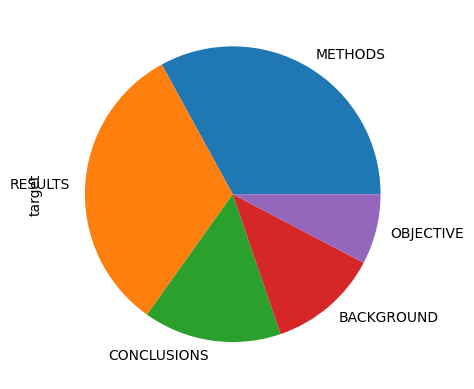

In [ ]:
ans.plot.pie()

In [ ]:
# Convert the lines of the abstract into list
train_sentences=train_df['text'].tolist()
test_sentences=test_df['text'].tolist()
val_sentences=val_df['text'].tolist()

**One hot Encoder:**

In [ ]:

# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Label Encoder**

Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, i.e. y, and not the input X.

It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html



In [ ]:
# Extract labels ("target" columns) and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_labels_encoded=label_encoder.fit_transform(train_df['target'].to_numpy())
test_labels_encoded=label_encoder.transform(test_df['target'].to_numpy())
val_labels_encoded=label_encoder.transform(val_df['target'].to_numpy())

In [ ]:
num_classes = len(label_encoder.classes_)
num_classes, label_encoder.classes_

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

Now its time to convert our text into the numbers this can be done using TextVectorization and embedding

But before moving towards the textvectorization we need to figure out the maximum length of sentence.

For example, if one sentence is eight words long and another is 50 words long, we want to pad the eight word sentence with zeros so it ends up being the same length as the 50 word sentence.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # return average sentence length (in tokens)

26.338269273494777

the vast majority of sentences are between 0 and 50 tokens in length.

We can use NumPy's percentile to find the value which covers 95% of the sentence lengths.

In [ ]:

# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len


55

55 tokens will be require to comprise the 95% of our sentence

keep the output_sequence_length to 55 in our textvectorizer

Create text vectorizer

max_tokens in  TextVectorization will represent the max_numbers of the unique vocabulary present in the text.

In the PubMed 200k RCT paper states the vocabulary size of the PubMed 20k dataset as 68,000

so we will use the max_tokens as 68k

In [ ]:
from tensorflow.keras.layers import  TextVectorization
text_vectorizer=TextVectorization(output_sequence_length=55,
                                  max_tokens=68000)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
# Let's check the working of the text_vectorizer
import random
target_sentence=random.choice(train_sentences)
print('target_sentence:{}'.format(target_sentence))
print('vectorized_sentence:{}'.format(text_vectorizer([target_sentence])))

target_sentence:the primary endpoint was mean percentage change from baseline in pth during the efficacy assessment phase ( eap ) in cohorts @ and @ .
vectorized_sentence:[[    2    56   349    10    57   467   133    27    49     5  3375    52
      2    79   250   209 13362     5  1719     3     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


Embedding

In [ ]:
from tensorflow.keras import layers
embedding=layers.Embedding(input_dim=len(text_vectorizer.get_vocabulary()),
                           output_dim=128,
                           mask_zero=True,
                           name="token_embedding")


In [ ]:
print('sentence:{}'.format(target_sentence))
print('vectorized_sentence:{}'.format(text_vectorizer([target_sentence])))
print('embeded_sentence:{}'.format(embedding(text_vectorizer([target_sentence]))))

sentence:the primary endpoint was mean percentage change from baseline in pth during the efficacy assessment phase ( eap ) in cohorts @ and @ .
vectorized_sentence:[[    2    56   349    10    57   467   133    27    49     5  3375    52
      2    79   250   209 13362     5  1719     3     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]
embeded_sentence:[[[ 0.01876559 -0.02571927 -0.04049407 ... -0.02673918 -0.01007243
   -0.0463583 ]
  [ 0.02768184 -0.03417248 -0.00674144 ...  0.02870179  0.04692756
   -0.0282405 ]
  [-0.0318469  -0.00163562 -0.04697411 ...  0.03430768  0.04073927
    0.04847759]
  ...
  [ 0.03965834  0.03130596  0.03519524 ...  0.02251753 -0.01655508
   -0.04399237]
  [ 0.03965834  0.03130596  0.03519524 ...  0.02251753 -0.01655508
   -0.04399237]
  [ 0.03965834  0.03130596  0.03519524 ...  0.02251753 -

###TensorFlow Input Pipeline

The tf.data API makes it possible to handle large amounts of data, read from different data formats, and perform complex transformations.

Achieving peak performance requires an efficient input pipeline that delivers data for the next step before the current step has finished. The tf.data API helps to build flexible and efficient input pipelines.
resource:-https://www.tensorflow.org/guide/data_performance

**Converting into the dataset :**

Here we pass the train_sentences and train_labels(one hot encoded)

In [ ]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
val_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

**Converting the data into the batches:-**

In [ ]:
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset=val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

**Helper Function**

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-09-24 06:46:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-24 06:46:14 (93.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



**Building model from TensorFlow Hub**

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
x=layers.Dense(128,activation='relu')(x)
outputs = layers.Dense(5, activation="softmax")(x) # create the output layer
model_pretrained_embedding = tf.keras.Model(inputs=inputs,
                                             outputs=outputs)

# Compile the model
model_pretrained_embedding.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_pretrained_embedding.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=3,
            validation_data=val_dataset,
            validation_steps=int(0.1 * len(val_dataset)))


Epoch 1/3
562/562 [==============================] - 17s 15ms/step - loss: 0.8814 - accuracy: 0.6532 - val_loss: 0.7748 - val_accuracy: 0.6951
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7360 - accuracy: 0.7141 - val_loss: 0.7133 - val_accuracy: 0.7231
Epoch 3/3
562/562 [==============================] - 8s 14ms/step - loss: 0.7066 - accuracy: 0.7277 - val_loss: 0.6832 - val_accuracy: 0.7394


In [ ]:
model_pretrained_embedding_pred_probs=model_pretrained_embedding.predict(val_dataset)
model_pretrained_embedding_pred_probs=tf.argmax(model_pretrained_embedding_pred_probs, axis=1)
model_pretrained_embedding_pred_probs

945/945 [==============================] - 10s 10ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

Character Level Tokenization

In [ ]:
def split_chars(text):
  return " ".join(list(text))

In [ ]:
train_chars=[split_chars(chars) for chars in train_sentences]
test_chars=[split_chars(chars) for chars in test_sentences]
val_chars=[split_chars(chars) for chars in val_sentences]
print(train_chars[0])
print(test_chars[0])
print(val_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .
t h i s   s t u d y   a n a l y z e d   l i v e r   f u n c t i o n   a b n o r m a l i t i e s   i n   h e a r t   f a i l u r e   p a t i e n t s   a d m i t t e d   w i t h   s e v e r e   a c u t e   d e c o m p e n s a t e d   h e a r t   f a i l u r e   (   a d h f   )   .
i g e   s e n s i t i z a t i o n   t o   a s p e r g i l l u s   f u m i g a t u s   a n d   a   p o s i t i v e   s p u t u m   f u n g a l   c u l t u r e 

In [ ]:
char_len=[len(sentences) for sentences in train_chars]
mean_char_len=np.mean(char_len)
mean_char_len

297.7325149966674

**Tokenization**

In tokenization max_token_length refers to maximun number of the unique vacabulary(words) used in the text.

Similarily in character level Tokenization max_token_length would be unique characters which are repeatdly used to form unique vocabulary.

"abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~"

In [ ]:
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
NUM_CHAR_TOKENS=len(alphabet)+2 # For space + unknown vocab
char_token_vectorizer=TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=290,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

In [ ]:
char_token_vectorizer.adapt(train_chars)

In [ ]:
random_chars=random.choice(train_chars)
print("Charified_Text: {}".format(random_chars))


print("vectorized_text: {}".format(char_token_vectorizer([random_chars])))

Charified_Text: b a s e l i n e   c h a r a c t e r i s t i c s   i n c l u d e   :   m e a n   a g e   @   (   s t a n d a r d   d e v i a t i o n   @   )   y e a r s   ;   m a l e   @   %   ;   m e a n   t i m e   f r o m   s t r o k e   t o   r e c r u i t m e n t   @   (   @   )   h   ;   m e a n   s e v e r i t y   (   s c a n d i n a v i a n   s t r o k e   s c a l e   )   @   (   @   )   o f   @   ;   m e a n   b l o o d   p r e s s u r e   @   (   @   )   /   @   (   @   )   m m h g   ;   i s c h a e m i c   s t r o k e   @   %   ;   a n d   i n t r a c e r e b r a l   h a e m o r r h a g e   @   %   .
vectorized_text: [[22  5  9  2 12  4  6  2 11 13  5  8  5 11  3  2  8  4  9  3  4 11  9  4
   6 11 12 16 10  2 15  2  5  6  5 18  2  9  3  5  6 10  5  8 10 10  2 21
   4  5  3  4  7  6 19  2  5  8  9 15  5 12  2 15  2  5  6  3  4 15  2 17
   8  7 15  9  3  8  7 23  2  3  7  8  2 11  8 16  4  3 15  2  6  3 13 15
   2  5  6  9  2 21  2  8  4  3 19  9 11  5  6 10  4  6  5 21  4  5  

 a length shorter than 290 (output_seq_char_length) get padded with zeros on the end, this ensures all sequences passed to our model are the same length.

**Char_level_embeddig**

he structure of the model in Figure 1 of Neural Networks for Joint Sentence Classification in Medical Paper Abstracts, the output dimension of the character embedding (output_dim) will be 25


In [ ]:
Char_level_embedding=layers.Embedding(input_dim=28,
                                      output_dim=25,
                                      mask_zero=False,
                                      name="char_embed")
print("charified_text:{}".format(random_chars))
print("embed_text: {}".format((Char_level_embedding(char_token_vectorizer([random_chars])))))


charified_text:b a s e l i n e   c h a r a c t e r i s t i c s   i n c l u d e   :   m e a n   a g e   @   (   s t a n d a r d   d e v i a t i o n   @   )   y e a r s   ;   m a l e   @   %   ;   m e a n   t i m e   f r o m   s t r o k e   t o   r e c r u i t m e n t   @   (   @   )   h   ;   m e a n   s e v e r i t y   (   s c a n d i n a v i a n   s t r o k e   s c a l e   )   @   (   @   )   o f   @   ;   m e a n   b l o o d   p r e s s u r e   @   (   @   )   /   @   (   @   )   m m h g   ;   i s c h a e m i c   s t r o k e   @   %   ;   a n d   i n t r a c e r e b r a l   h a e m o r r h a g e   @   %   .
embed_text: [[[ 0.02447618 -0.04230415 -0.01800177 ...  0.02548008 -0.03304224
   -0.04454322]
  [ 0.00076892 -0.04016026 -0.00932391 ...  0.02755976 -0.04252974
   -0.04771961]
  [ 0.02851899 -0.04005891 -0.04369199 ... -0.00821354 -0.03238052
    0.00524361]
  ...
  [-0.04826951 -0.00632785 -0.02132412 ...  0.03915315 -0.03049218
   -0.04879593]
  [-0.04826951 -0.00632785 -0.021

**Conv1D model to fit on character embeddings**

Input (character-level text) -> Tokenize -> Embedding -> Layers (Conv1D, GlobalMaxPool1D) -> Output (label probability)

Using the tf.data.dataset api for optimization

In [ ]:
train_char_dataset=tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset=tf.data.Dataset.from_tensor_slices((val_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
inputs=layers.Input(shape=(1,),dtype="string")
char_vectorizer=char_token_vectorizer(inputs)
char_embedding=Char_level_embedding(char_vectorizer)
x=layers.Conv1D(64,kernel_size=5,activation="relu",padding="same")(char_embedding)
x = layers.GlobalMaxPool1D()(x)
outputs = tf.keras.layers.Dense(5, activation="softmax")(x)
model_Conv1d=tf.keras.Model(inputs=inputs,
                            outputs=outputs,
                            name="model_Conv1d")
model_Conv1d.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_Conv1d.fit(train_char_dataset,
                steps_per_epoch=int(0.1 * len(train_char_dataset)),
                 epochs=5,
                validation_data=val_char_dataset,
                validation_steps=int(0.1 * len(val_char_dataset)))



Epoch 1/5
562/562 [==============================] - 10s 7ms/step - loss: 1.2612 - accuracy: 0.4854 - val_loss: 1.0541 - val_accuracy: 0.5851
Epoch 2/5
562/562 [==============================] - 3s 6ms/step - loss: 1.0143 - accuracy: 0.5948 - val_loss: 0.9597 - val_accuracy: 0.6237
Epoch 3/5
562/562 [==============================] - 4s 7ms/step - loss: 0.9371 - accuracy: 0.6331 - val_loss: 0.8864 - val_accuracy: 0.6533
Epoch 4/5
562/562 [==============================] - 3s 5ms/step - loss: 0.8835 - accuracy: 0.6588 - val_loss: 0.8589 - val_accuracy: 0.6729
Epoch 5/5
562/562 [==============================] - 3s 6ms/step - loss: 0.8704 - accuracy: 0.6573 - val_loss: 0.8282 - val_accuracy: 0.6818


In [ ]:
model_Conv1d_pred_probs=model_Conv1d.predict(val_char_dataset)
model_Conv1d_pred_probs=tf.argmax(model_Conv1d_pred_probs,axis=1)
model_Conv1d_pred_probs

945/945 [==============================] - 3s 3ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

**Combining pretrained token embeddings + character embeddings (hybrid embedding layer)**

This hybrid token embedding layer is a combination of token embeddings and character embeddings

Create a token-level model (similar to model_pretrained_embedding)

Create a character-level model (similar to model_Conv1d)

Combine (using layers.Concatenate) the outputs of 1 and 2

Build a series of output layers on top of 3 layers ie combination layers

In [ ]:
# Token_model
token_inputs=layers.Input(shape=[],dtype=tf.string,name="token_input")
token_embedding_layers=tf_hub_embedding_layer(token_inputs)
x=layers.Dense(128,activation='relu')(token_embedding_layers)
token_outputs=layers.Dense(128,activation='relu')(x)
token_model=tf.keras.Model(inputs=token_inputs,
                           outputs=token_outputs,
                           name='token_model')

# Character_level_model

char_inputs=layers.Input(shape=(1,),dtype=tf.string,name='char_inputs')
char_vectorizer=char_token_vectorizer(char_inputs)
char_embedding=Char_level_embedding(char_vectorizer)
# According to the paper we have to use the bilstm :
char_bi_lstm=layers.Bidirectional(layers.LSTM(48))(char_embedding)
char_model=tf.keras.Model(inputs=char_inputs,
                          outputs=char_bi_lstm,
                          name="char_model")

# we have to concatenate the outputs from both the layers (hybrid token embedding)
token_char_concat=tf.keras.layers.Concatenate(name="token_char_hybrid")([token_model.output,char_model.output])

# Inorder to avoid the overfitting we are going to use the dropout layer.
combine_dropout=layers.Dropout(0.5)(token_char_concat)
dense_layer_1=layers.Dense(128,activation='relu')(combine_dropout)
dense_layer_2=layers.Dense(128,activation='relu')(dense_layer_1)
final_dropout=layers.Dropout(0.5)(dense_layer_2)
output_layer=layers.Dense(5,activation='softmax')(final_dropout)

model_combined=tf.keras.Model(inputs=[token_model.input,char_model.input],
                              outputs=output_layer,
                              name='model_combined')
model_combined.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


#Worflow of the model:

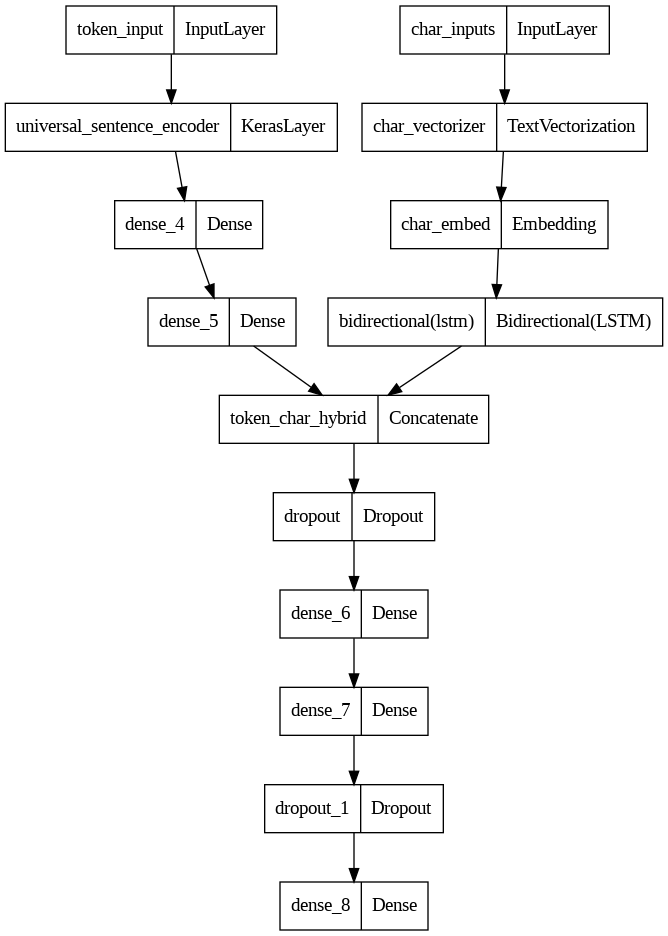

In [ ]:
from keras.utils import plot_model
plot_model(model_combined)

The difference with this model is that it requires two inputs, token-level sequences and character-level sequences

In [ ]:
# Train_data
train_token_char_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
tarin_token_char_dataset=tf.data.Dataset.zip((train_token_char_data,train_char_token_labels))
train_token_char_dataset=tarin_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Val_data

val_token_char_data=tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_token_char_dataset=tf.data.Dataset.zip((val_token_char_data,val_char_token_labels))
val_token_char_dataset=val_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
history_model_combined=model_combined.fit(train_token_char_dataset,
                                          steps_per_epoch=int(0.1 * len(train_token_char_dataset)),
                                          epochs=5,
                                          validation_data=val_token_char_dataset,
                                          validation_steps=int(0.1 * len(train_token_char_dataset)))

Epoch 1/5
562/562 [==============================] - 35s 50ms/step - loss: 0.9734 - accuracy: 0.6037 - val_loss: 0.7844 - val_accuracy: 0.6932
Epoch 2/5
562/562 [==============================] - 27s 48ms/step - loss: 0.7784 - accuracy: 0.7050 - val_loss: 0.7008 - val_accuracy: 0.7346
Epoch 3/5
562/562 [==============================] - 26s 46ms/step - loss: 0.7422 - accuracy: 0.7214 - val_loss: 0.6713 - val_accuracy: 0.7432
Epoch 4/5
562/562 [==============================] - 27s 48ms/step - loss: 0.7121 - accuracy: 0.7371 - val_loss: 0.6574 - val_accuracy: 0.7498
Epoch 5/5
562/562 [==============================] - 26s 46ms/step - loss: 0.7095 - accuracy: 0.7372 - val_loss: 0.6343 - val_accuracy: 0.7567


In [ ]:
model_combined_pred_probs=model_combined.predict(val_token_char_dataset)
model_combined_pred_probs=tf.argmax(model_combined_pred_probs,axis=1)
model_combined_pred_probs


945/945 [==============================] - 19s 19ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


Postional Embedding..

Now our Data consist up of the cols as line_number and total_lines and we are going to use it.


This is a problem which belongs to sequence labelling problem in which the machine learning algorithm will assign
label to the sequence in the dataset.


Here if we observe our dataset then we find out that the always the abstract starts with Objective the methods upto conclusion.


The chronology is same :
OBJECTIVE

METHOD 1

METHOD 2

...                        
...                      
...     

RESULTS

CONCLUSION



                         



So we can use this feature as a input along with token_inputs and char_inputs so as the model will train more accurately.


We will use one_hot encodding for encodding the line_number and total_lines

In [ ]:
train_df['line_number'].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

Here the maximum lines upto with the sentences in the abstract is around 20 so we place the depth as 20

**Line_number one_hot_encoded**

In [ ]:
line_number_one_hot=tf.one_hot(train_df["line_number"].to_numpy(),depth=20)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=20)
test_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=20)

In [ ]:
total_number_one_hot=tf.one_hot(train_df['total_lines'].to_numpy(),depth=20)
val_number_one_hot=tf.one_hot(val_df['total_lines'].to_numpy(),depth=20)
test_total_number_one_hot=tf.one_hot(test_df['total_lines'].to_numpy(),depth=20)

**Build the Trihybrid layer containing
token_embedding_layers, Char_level_embedding_layer, positional_embedding. ***




1.   Create a token_level_model
2.   Create a char_level_model
3.   Create a line_number_model
4.   Create a total_line_model
5.   concatenate 1 and 2
6.   concatenate 3,4 and 5
7.   create a output layer
8.   create the model using tf.kears.Model()



In [ ]:
# Token_model
token_inputs=layers.Input(shape=[],dtype=tf.string,name="token_input")
token_embedding_layers=tf_hub_embedding_layer(token_inputs)
x=layers.Dense(128,activation='relu')(token_embedding_layers)
token_outputs=layers.Dense(128,activation='relu')(x)
token_model=tf.keras.Model(inputs=token_inputs,
                           outputs=token_outputs,
                           name='token_model')

# Character_level_model

char_inputs=layers.Input(shape=(1,),dtype=tf.string,name='char_inputs')
char_vectorizer=char_token_vectorizer(char_inputs)
char_embedding=Char_level_embedding(char_vectorizer)
# According to the paper we have to use the bilstm :
char_bi_lstm=layers.Bidirectional(layers.LSTM(48))(char_embedding)
char_model=tf.keras.Model(inputs=char_inputs,
                          outputs=char_bi_lstm,
                          name="char_model")
# Line_model
line_number_model_input=layers.Input(shape=(20),dtype=tf.float32,name='line_number_input')
x=layers.Dense(32,activation='relu')(line_number_model_input)
line_number_model=tf.keras.Model(inputs=line_number_model_input,
                                 outputs=x)

# Total_line_model
total_lines_model_inputs=layers.Input(shape=(20),dtype=tf.float32,name="total_lines_model_inputs")
y=layers.Dense(32,activation='relu')(total_lines_model_inputs)
total_lines_model=tf.keras.Model(inputs=total_lines_model_inputs,
                                 outputs=y)

# Concatenate the layers

token_char_concatenation_layer=tf.keras.layers.Concatenate(name='token_char_concatenation_layer',axis=1)([token_model.output,
                                                                                                           char_model.output])

dense_layer=layers.Dense(256,activation='relu')(token_char_concatenation_layer)
z=layers.Dropout(0.5)(dense_layer)

# concatenate 3,4 and 5

combined_trihybrid_layer=tf.keras.layers.Concatenate(name='combined_trihybrid_layer')([line_number_model.output,
                                                                                       total_lines_model.output,
                                                                                       z])

# Creating output layer

output_layer=layers.Dense(5,activation="softmax")(combined_trihybrid_layer)

# Creating a model

trihybrid_model=tf.keras.Model(inputs=[token_model.input,
                                       char_model.input,
                                       line_number_model.input,
                                       total_lines_model.input],
                               outputs=output_layer,
                               name='Trihybrid_model')

# Compile the model
trihybrid_model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Before fitting the model on the data we will use the tf.data api to create input pipeline inorder to optimize the model



Train line numbers one-hot tensor (line_numbers_one_hot)

Train total lines one-hot tensor (total_lines_one_hot)

Token-level sequences tensor (train_sentences)

Char-level sequences tensor (train_chars)

In [ ]:
train_token_char_positional_data=tf.data.Dataset.from_tensor_slices((train_sentences,
                                                                        train_chars,
                                                                        line_number_one_hot,
                                                                        total_number_one_hot))
train_token_char_positional_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_token_char_positional_dataset=tf.data.Dataset.zip((train_token_char_positional_data,train_token_char_positional_labels))
train_token_char_positional_dataset=train_token_char_positional_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


val_token_char_positional_data=tf.data.Dataset.from_tensor_slices((val_sentences,
                                                                   val_chars,
                                                                   val_line_numbers_one_hot,
                                                                   val_number_one_hot))
val_token_char_positional_labels=tf.data.Dataset.from_tensor_slices((val_labels_one_hot))
val_token_char_positional_dataset=tf.data.Dataset.zip((val_token_char_positional_data,val_token_char_positional_labels))
val_token_char_positional_dataset=val_token_char_positional_dataset.batch(32).prefetch(tf.data.AUTOTUNE)




In [ ]:
History_trihybrid_model=trihybrid_model.fit(train_token_char_positional_dataset,
                                            steps_per_epoch=int(0.1 * len(train_token_char_positional_dataset)),
                                            epochs=5,
                                            validation_data=val_token_char_positional_dataset,
                                            validation_steps=int(0.1 * len(val_token_char_positional_dataset)))

Epoch 1/5
562/562 [==============================] - 29s 41ms/step - loss: 0.7507 - accuracy: 0.7165 - val_loss: 0.5371 - val_accuracy: 0.8015
Epoch 2/5
562/562 [==============================] - 20s 36ms/step - loss: 0.4923 - accuracy: 0.8149 - val_loss: 0.4580 - val_accuracy: 0.8331
Epoch 3/5
562/562 [==============================] - 18s 32ms/step - loss: 0.4584 - accuracy: 0.8191 - val_loss: 0.4439 - val_accuracy: 0.8268
Epoch 4/5
562/562 [==============================] - 20s 36ms/step - loss: 0.4404 - accuracy: 0.8339 - val_loss: 0.4229 - val_accuracy: 0.8371
Epoch 5/5
562/562 [==============================] - 18s 31ms/step - loss: 0.4266 - accuracy: 0.8375 - val_loss: 0.4062 - val_accuracy: 0.8434


In [ ]:
trihybrid_model.pred_probs=trihybrid_model.predict(val_token_char_positional_dataset)
trihybrid_model.pred_probs=tf.argmax(trihybrid_model.pred_probs,axis=1)
trihybrid_model.pred_probs

945/945 [==============================] - 18s 18ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 1])>

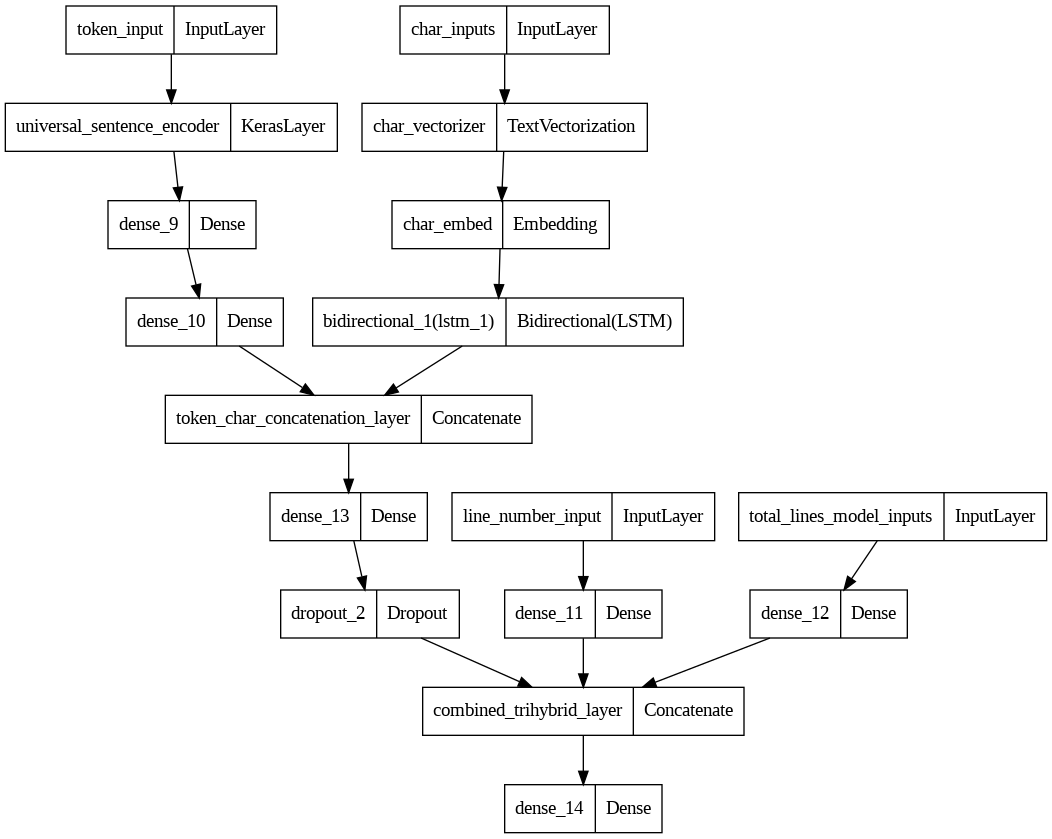

In [ ]:
from keras.utils import plot_model
plot_model(trihybrid_model)

Saving & Loading model.

In [ ]:
trihybrid_model.save("skimlit_model")

In [ ]:
load_model=tf.keras.models.load_model("skimlit_model")

Checking on the Test Dataset


In [ ]:
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((
                                                              test_sentences,
                                                              test_chars,
                                                              test_numbers_one_hot,
                                                              test_total_number_one_hot
                                                              ))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
load_model_pred_probs=load_model.predict(test_pos_char_token_dataset)
load_model_pred_probs=tf.argmax(load_model_pred_probs,axis=1)
load_model_pred_probs

942/942 [==============================] - 18s 18ms/step


<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([3, 2, 2, ..., 4, 4, 1])>

**Making Predictions on the example data**

Split it into sentences (lines).

Split it into characters.

Find the number of each line.

Find the total number of lines.

In [ ]:

import json
# Download and open example abstracts (copy and pasted from PubMed)
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

with open("skimlit_example_abstracts.json", "r") as file_:
  example_abstracts = json.load(file_)

example_abstracts


--2023-09-24 06:55:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘skimlit_example_abstracts.json’

skimlit_example_abs 100%[===================>]   6.58K  --.-KB/s    in 0s      

2023-09-24 06:55:29 (90.7 MB/s) - ‘skimlit_example_abstracts.json’ saved [6737/6737]



[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [ ]:
abstracts=pd.DataFrame(example_abstracts)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [ ]:
# Create sentencizer - Source: https://spacy.io/usage/linguistic-features#sbd
from spacy.lang.en import English
nlp = English() # setup English sentence parser
sentencizer = nlp.add_pipe("sentencizer") # create sentence splitting pipeline object
doc = nlp(example_abstracts[0]["abstract"])
abstract_lines = [str(sent) for sent in list(doc.sents)]
abstract_lines
test_list=[]
total_lines=len(abstract_lines)
for i , lines in enumerate(abstract_lines):
  test_dict={}
  test_dict['text']=str(lines)
  test_dict['line_number']=i
  test_dict['total_lines']=total_lines-1
  test_list.append(test_dict)
test_list
abstract_line=[line['text'] for line in test_list]
abstract_line
abstract_chars=[split_chars(line) for line in abstract_line]
abstract_chars
abstract_line_number=[line['line_number'] for line in test_list]
abstract_line_number_one_hot=tf.one_hot(abstract_line_number,depth=20)
abstract_line_number_one_hot
abstract_total_lines=[line['total_lines'] for line in test_list]
abstract_total_lines_one_hot=tf.one_hot(abstract_total_lines,depth=20)
abstract_total_lines_one_hot


<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

Creating the a list of Dictionaries....

Now our model required the inputs as the token_sentences,chars_sentences,line_ number_one_hot,total_line_one_hot.

In [ ]:
random_example_testing=load_model.predict((tf.constant(abstract_line),
                                           tf.constant(abstract_chars),
                                           abstract_line_number_one_hot,
                                           abstract_total_lines_one_hot))

random_example_testing=tf.argmax(random_example_testing,axis=1)
random_example_testing

1/1 [==============================] - 0s 37ms/step


<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 4, 2, 4, 4])>

In [ ]:
random_example_testing_classes=[label_encoder.classes_[i] for i in random_example_testing ]
for i,line in enumerate(abstract_line):
  print("{}:{}".format(random_example_testing_classes[i],line))

OBJECTIVE:This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS:Participants were randomly assigned to treatment or wait-list conditions.
METHODS:Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS:A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
RESULTS:Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS:Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS:High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS:Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.
